<a href="https://colab.research.google.com/github/Eric-Mendes/estatisticas-quem-cair-calil/blob/main/dados_quem_cair_calil_20_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DADOS SOBRE A MELHOR LIGA DO UNIVERSO!**

A liga Quem Cair Calil foi criada em 2020 para a temporada 20/21 do
Campeonato Brasileiro de futebol masculino, Série A.

In [1]:
RODADAS = 33

In [2]:
# importando as bibliotecas necessárias para estudar os dados
import numpy as np # matemática
import matplotlib.pyplot as plt # gráficos
import pandas as pd # tabelas

In [3]:
# importando os dados (do github)
url = 'https://raw.githubusercontent.com/Eric-Mendes/estatisticas-quem-cair-\
calil/main/data/pontuacoes_cartola_2020_2021.csv'

# criando um dataFrame (tabela) para a melhor visualização dos dados
df = pd.read_csv(url)
 
# informações da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RODADA     231 non-null    object 
 1   TIME       231 non-null    object 
 2   PONTUAÇÃO  231 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.5+ KB


**Tratamento dos dados**

Tornando "RODADA" um número inteiro:

In [4]:
rodadas = list(df['RODADA'])
numero_rodada = [int(rodada.replace('RODADA', '')) for rodada in rodadas]
df.RODADA = numero_rodada
df.head()

,RODADA,TIME,PONTUAÇÃO
0,5,Unichampions,16.54
1,27,Unichampions,20.87
2,8,Unichampions,21.13
3,6,Unichampions,22.35
4,1,Unichampions,23.21


Ordenando os dados por time e rodada:

In [5]:
df = df.sort_values(by=['TIME', 'RODADA'])
df.head()

,RODADA,TIME,PONTUAÇÃO
108,1,Caio do Céu,44.61
101,2,Caio do Céu,31.57
102,3,Caio do Céu,34.23
105,4,Caio do Céu,37.14
112,5,Caio do Céu,50.98


Checando se há pontuação 0 (pois possivelmente significa que o dado não foi pegado de forma correta): 

In [6]:
# checando se há pontuação zero
df.loc[df['PONTUAÇÃO'] == 0.00]

,RODADA,TIME,PONTUAÇÃO
165,1,Do Pescoço pra Baixo é Canela EC,0.0
132,28,Ibobesta Líbero,0.0
203,1,Janderson maisdez,0.0


Adicionando a coluna total ao dataFrame:

In [7]:
def get_total(time, sem_cap=False):
  pontuacoes = []
  if not sem_cap:
    pontuacoes = list(df['PONTUAÇÃO'].loc[df['TIME'] == time])
  else:
    pontuacoes = list(df['PONTUAÇÃO SEM CAPITÃO'].loc[df['TIME'] == time])
  total = []
  soma = 0
  for pontuacao in pontuacoes:
    soma += pontuacao
    total.append(soma)

  return total

In [8]:
df['TIME'].unique()

array(['Caio do Céu', 'Do Pescoço pra Baixo é Canela EC', 'Gigante de JF',
       'Ibobesta Líbero', 'Janderson maisdez', 'Unichampions',
       'Vanculotte Atiantino'], dtype=object)

In [9]:
total_caio = get_total('Caio do Céu')
total_canela = get_total('Do Pescoço pra Baixo é Canela EC')
total_gigante = get_total('Gigante de JF')
total_ibobesta = get_total('Ibobesta Líbero')
total_janderson = get_total('Janderson maisdez')
total_unichampions = get_total('Unichampions')
total_vanculotte = get_total('Vanculotte Atiantino')

total = total_caio + total_canela + total_gigante + total_ibobesta +\
total_janderson + total_unichampions + total_vanculotte

df['TOTAL'] = total
df.head()

,RODADA,TIME,PONTUAÇÃO,TOTAL
108,1,Caio do Céu,44.61,44.61
101,2,Caio do Céu,31.57,76.18
102,3,Caio do Céu,34.23,110.41
105,4,Caio do Céu,37.14,147.55
112,5,Caio do Céu,50.98,198.53


Reorganizando as colunas:

**Classificações**

In [10]:
def classificacao(total=False, sem_cap=False):
  aux = [i for i in range(len(list(df['TOTAL'])))]
  column = ''
  key=''
  if not total and not sem_cap:
    column = 'CLASSIFICAÇÃO NA RODADA'
    key='PONTUAÇÃO'
  elif total and not sem_cap:
    column = 'CLASSIFICAÇÃO GERAL'
    key='TOTAL'
  elif not total and sem_cap:
    column = 'CLASSIFICAÇÃO DO CAPITÃO'
    key='CAPITÃO'
  df[column] = aux

  if not sem_cap:
    for i in range(1, RODADAS+1):
      df_aux = df.loc[df['RODADA'] == i].sort_values(by=key, ascending=False)
      times = list(df_aux['TIME'])
      posicao = 1
      for time in times:
        index = df.index[(df.RODADA == i) & (df.TIME == time)]
        df.at[index, column] = posicao
        posicao += 1
  else:
    for i in range(1, RODADAS+1):
      df_aux = df.loc[df['RODADA'] == i].sort_values(by=key, ascending=False)
      CAPITAES = list(df_aux['CAPITÃO'])
      TIMES = list(df_aux['TIME'])

      capitao_lider = CAPITAES[0]
      time_lider = TIMES[0]
      index = df.index[(df.RODADA == i) & (df.TIME == time_lider)]
      df.at[index, column] = 1
      j = 1
      pos = 1
      last_pos = pos
      for time in TIMES[1:]:
        if CAPITAES[j] == CAPITAES[j-1]:
          index = df.index[(df.RODADA == i) & (df.TIME == time)]
          df.at[index, column] = last_pos
        else:
          index = df.index[(df.RODADA == i) & (df.TIME == time)]
          df.at[index, column] = last_pos+1
          last_pos += 1
        j += 1

In [11]:
classificacao()

rcontagem_unichampions = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Unichampions')].count()
rcontagem_vanculotte = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Vanculotte Atiantino')].count()
rcontagem_caio = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Caio do Céu')].count()
rcontagem_gigante = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Gigante de JF')].count()
rcontagem_janderson = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Janderson maisdez')].count()
rcontagem_canela = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Do Pescoço pra Baixo\
                                 é Canela EC')].count()
rcontagem_ibobesta = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Ibobesta Líbero')].count()

In [12]:
classificacao(True)

gcontagem_unichampions = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Unichampions')].count()
gcontagem_vanculotte = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Vanculotte Atiantino')].count()
gcontagem_caio = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Caio do Céu')].count()
gcontagem_gigante = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Gigante de JF')].count()
gcontagem_janderson = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Janderson maisdez')].count()
gcontagem_canela = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Do Pescoço pra Baixo\
                                 é Canela EC')].count()
gcontagem_ibobesta = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Ibobesta Líbero')].count()

**Mostrando a tabela para cada time**

In [14]:
df.loc[df.TIME == 'Gigante de JF'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL
37,1,Gigante de JF,31.93,31.93,2,2
34,2,Gigante de JF,23.67,55.60,7,5
52,3,Gigante de JF,66.58,122.18,1,1
35,4,Gigante de JF,27.13,149.31,4,3
39,5,Gigante de JF,37.18,186.49,4,3
38,6,Gigante de JF,32.88,219.37,3,3
40,7,Gigante de JF,37.78,257.15,5,3
54,8,Gigante de JF,77.38,334.53,2,3
59,9,Gigante de JF,79.67,414.20,3,3
48,10,Gigante de JF,55.07,469.27,1,3


In [15]:
df.loc[df.TIME == 'Unichampions'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL
4,1,Unichampions,23.21,23.21,5,5
12,2,Unichampions,37.61,60.82,2,2
17,3,Unichampions,48.05,108.87,2,3
16,4,Unichampions,47.02,155.89,2,2
0,5,Unichampions,16.54,172.43,7,4
3,6,Unichampions,22.35,194.78,5,4
15,7,Unichampions,43.44,238.22,4,4
2,8,Unichampions,21.13,259.35,5,4
27,9,Unichampions,71.56,330.91,4,4
6,10,Unichampions,25.87,356.78,5,4


In [16]:
df.loc[df.TIME == 'Vanculotte Atiantino'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL
71,1,Vanculotte Atiantino,30.98,30.98,3,3
70,2,Vanculotte Atiantino,28.66,59.64,6,3
76,3,Vanculotte Atiantino,44.53,104.17,3,4
83,4,Vanculotte Atiantino,61.87,166.04,1,1
69,5,Vanculotte Atiantino,24.98,191.02,6,2
93,6,Vanculotte Atiantino,77.78,268.80,1,1
86,7,Vanculotte Atiantino,68.91,337.71,1,1
95,8,Vanculotte Atiantino,82.46,420.17,1,1
96,9,Vanculotte Atiantino,83.07,503.24,2,1
67,10,Vanculotte Atiantino,20.32,523.56,6,1


In [17]:
df.loc[df.TIME == 'Caio do Céu'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL
108,1,Caio do Céu,44.61,44.61,1,1
101,2,Caio do Céu,31.57,76.18,4,1
102,3,Caio do Céu,34.23,110.41,4,2
105,4,Caio do Céu,37.14,147.55,3,4
112,5,Caio do Céu,50.98,198.53,2,1
103,6,Caio do Céu,35.78,234.31,2,2
115,7,Caio do Céu,59.31,293.62,2,2
120,8,Caio do Céu,66.76,360.38,3,2
129,9,Caio do Céu,90.73,451.11,1,2
110,10,Caio do Céu,48.37,499.48,3,2


In [18]:
df.loc[df.TIME == 'Janderson maisdez'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL
203,1,Janderson maisdez,0.00,0.00,7,7
217,2,Janderson maisdez,32.59,32.59,3,7
206,3,Janderson maisdez,8.35,40.94,7,7
213,4,Janderson maisdez,19.07,60.01,6,7
220,5,Janderson maisdez,37.10,97.11,5,7
210,6,Janderson maisdez,16.70,113.81,6,7
225,7,Janderson maisdez,46.13,159.94,3,7
212,8,Janderson maisdez,18.93,178.87,7,7
201,9,Janderson maisdez,-3.84,175.03,7,7
224,10,Janderson maisdez,40.39,215.42,4,6


In [19]:
df.loc[df.TIME == 'Ibobesta Líbero'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL
146,1,Ibobesta Líbero,27.10,27.10,4,4
150,2,Ibobesta Líbero,30.78,57.88,5,4
154,3,Ibobesta Líbero,33.07,90.95,5,5
143,4,Ibobesta Líbero,24.27,115.22,5,5
158,5,Ibobesta Líbero,37.22,152.44,3,5
152,6,Ibobesta Líbero,32.65,185.09,4,5
147,7,Ibobesta Líbero,29.05,214.14,6,5
144,8,Ibobesta Líbero,24.44,238.58,4,5
133,9,Ibobesta Líbero,6.89,245.47,6,5
162,10,Ibobesta Líbero,53.99,299.46,2,5


In [20]:
df.loc[df.TIME == 'Do Pescoço pra Baixo é Canela EC'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL
165,1,Do Pescoço pra Baixo é Canela EC,0.00,0.00,6,6
191,2,Do Pescoço pra Baixo é Canela EC,38.40,38.40,1,6
175,3,Do Pescoço pra Baixo é Canela EC,15.64,54.04,6,6
174,4,Do Pescoço pra Baixo é Canela EC,15.39,69.43,7,6
197,5,Do Pescoço pra Baixo é Canela EC,69.82,139.25,1,6
176,6,Do Pescoço pra Baixo é Canela EC,15.77,155.02,7,6
172,7,Do Pescoço pra Baixo é Canela EC,12.53,167.55,7,6
182,8,Do Pescoço pra Baixo é Canela EC,20.92,188.47,6,6
178,9,Do Pescoço pra Baixo é Canela EC,16.25,204.72,5,6
167,10,Do Pescoço pra Baixo é Canela EC,6.60,211.32,7,7


**Plotando gráficos**

In [21]:
def plot_posicoes(times, contagens, colors, geral=False, sem_cap=False):
  title = ''
  label = 'Vezes que liderou'
  if geral and not sem_cap:
    title = 'Número de vezes que liderou a classificação geral'
  elif not geral and not sem_cap:
    title = 'Número de vezes que liderou uma rodada'

  elif not geral and sem_cap:
    title = 'Número de vezes que teve o melhor capitão da rodada'
    label = 'Vezes com o melhor capitão'

  plt.ylabel(label)
  N = len(times)
  ind = np.arange(N)
  plt.xticks(ind, times, rotation='vertical')
  plt.yticks(np.arange(0, max(contagens)+2, 2))
  plt.title(title)
  plt.bar(times, contagens, color=colors)
  plt.show()

In [22]:
def plot_geral(time, COLOR='b', total=False, sem_cap=False):
  pontuacoes = []
  title = ""
  if not total and not sem_cap:
    pontuacoes += list(df['PONTUAÇÃO'].loc[df['TIME'] == time])
    title = "{}: variação de pontuação por rodada".format(time)
  elif total and not sem_cap:
    pontuacoes += list(df['TOTAL'].loc[df['TIME'] == time])
    title = "Variação da pontuação total"
  
  elif not total and sem_cap:
    pontuacoes += list(df['PONTUAÇÃO SEM CAPITÃO'].loc[df['TIME'] == time])
    title = "{}: variação de pontuação por rodada (sem capitão)".format(time)

  elif total and sem_cap:
    pontuacoes += list(df['TOTAL SEM CAPITÃO'].loc[df['TIME'] == time])
    title = "Variação da pontuação total (sem capitão)"

  
  rodadas = [i for i in range(1, RODADAS+1)]
  plt.title(title)
  plt.ylabel("Pontuação")
  plt.xlabel("Rodada")
  plt.scatter(rodadas, pontuacoes, color=COLOR)
  plt.plot(rodadas, pontuacoes, color=COLOR, label=time)

*Plots:*

In [23]:
rodadas = [i for i in range(1, RODADAS+1)]
pont_caio = list(df['PONTUAÇÃO'].loc[df['TIME'] == 'Caio do Céu'])
pont_vanculotte = list(df['PONTUAÇÃO'].loc[df['TIME'] == 'Vanculotte Atiantino'])
pont_gigante = list(df['PONTUAÇÃO'].loc[df['TIME'] == 'Gigante de JF'])
pont_unichampions = list(df['PONTUAÇÃO'].loc[df['TIME'] == 'Unichampions'])

soma_caio = 0
soma_vanculotte = 0
soma_gigante = 0
soma_unichampions = 0

media_caio = []
media_vanculotte = []
media_gigante = []
media_unichampions = []

for rodada in rodadas:
  soma_caio += pont_caio[rodada-1]
  soma_vanculotte += pont_vanculotte[rodada-1]
  soma_gigante += pont_gigante[rodada-1]
  soma_unichampions += pont_unichampions[rodada-1]

  media_caio.append(soma_caio/rodada)
  media_vanculotte.append(soma_vanculotte/rodada)
  media_gigante.append(soma_gigante/rodada)
  media_unichampions.append(soma_unichampions/rodada)

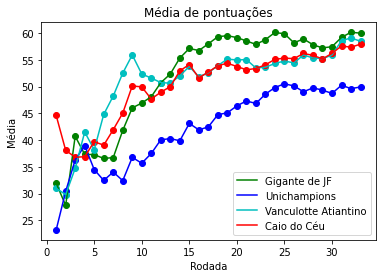

In [24]:
plt.title("Média de pontuações")
plt.ylabel("Média")
plt.xlabel("Rodada")
plt.scatter(rodadas, media_gigante, color='g')
plt.plot(rodadas, media_gigante, color='g', label='Gigante de JF')
plt.scatter(rodadas, media_unichampions, color='b')
plt.plot(rodadas, media_unichampions, color='b', label='Unichampions')
plt.scatter(rodadas, media_vanculotte, color='c')
plt.plot(rodadas, media_vanculotte, color='c', label='Vanculotte Atiantino')
plt.scatter(rodadas, media_caio, color='r')
plt.plot(rodadas, media_caio, color='r', label='Caio do Céu')
plt.legend()
plt.show()

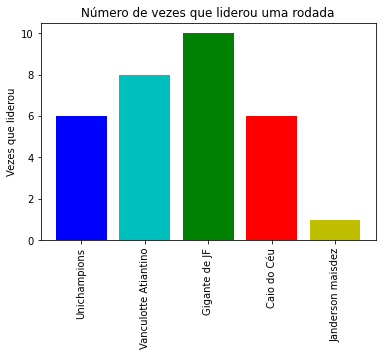

In [25]:
plot_posicoes(['Unichampions', 'Vanculotte Atiantino', 'Gigante de JF', \
                 'Caio do Céu', 'Janderson maisdez'], [rcontagem_unichampions, rcontagem_vanculotte,\
                                  rcontagem_gigante, \
         rcontagem_caio, rcontagem_janderson], ['b', 'c', 'g', 'r', 'y'])

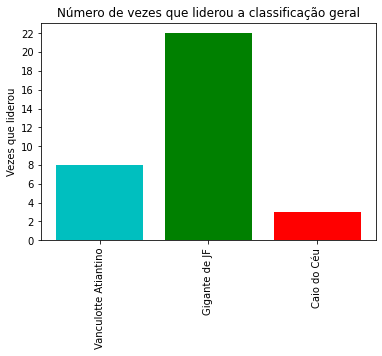

In [26]:
plot_posicoes(['Vanculotte Atiantino', 'Gigante de JF', 'Caio do Céu'], \
                [gcontagem_vanculotte, gcontagem_gigante, gcontagem_caio], \
                ['c', 'g', 'r'], geral=True)

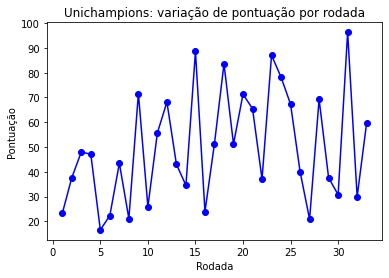

In [27]:
plot_geral("Unichampions")
plt.show()

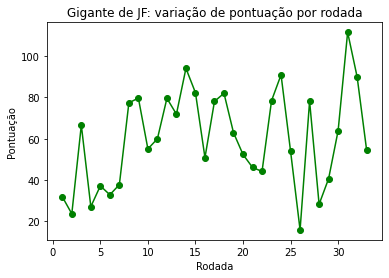

In [28]:
plot_geral("Gigante de JF", 'g')
plt.show()

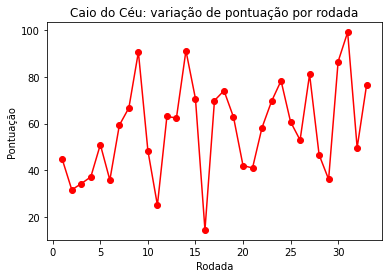

In [29]:
plot_geral("Caio do Céu", 'r')
plt.show()

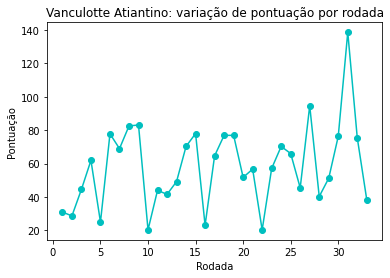

In [30]:
plot_geral("Vanculotte Atiantino", 'c')
plt.show()

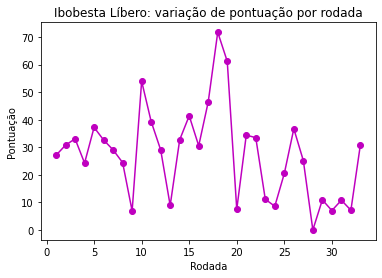

In [31]:
plot_geral("Ibobesta Líbero", 'm')
plt.show()

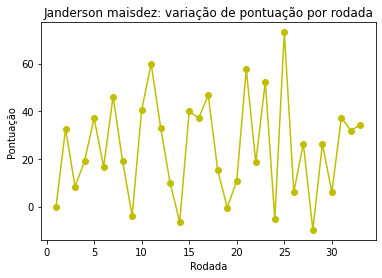

In [32]:
plot_geral("Janderson maisdez", 'y')
plt.show()

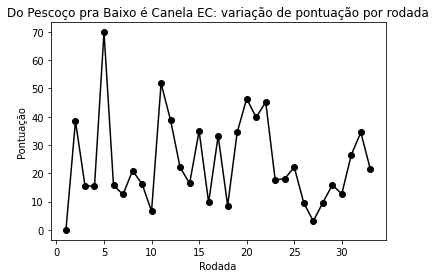

In [33]:
plot_geral("Do Pescoço pra Baixo é Canela EC", 'k')
plt.show()

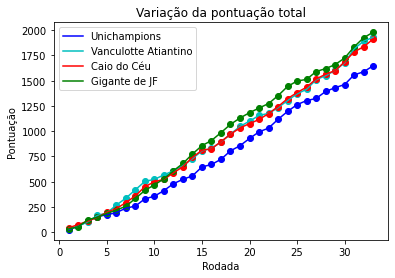

In [34]:
plot_geral("Unichampions", total=True)
plot_geral("Vanculotte Atiantino", 'c', True)
plot_geral("Caio do Céu", 'r', True)
plot_geral("Gigante de JF", 'g', True)
plt.legend()
plt.show()

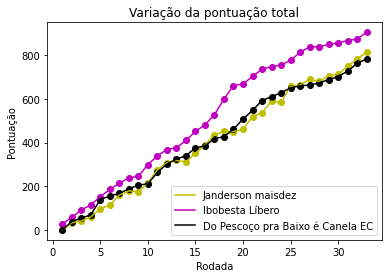

In [35]:
plot_geral("Janderson maisdez", 'y', True)
plot_geral("Ibobesta Líbero", 'm', True)
plot_geral("Do Pescoço pra Baixo é Canela EC", 'k', True)
plt.legend()
plt.show()

In [36]:
rodadas = [i for i in range(1, RODADAS+1)]
gigante = []
unichampions = []
vanculotte = []
caio = []
for rodada in rodadas:
  total_lider = df['TOTAL'].loc[(df['RODADA'] == rodada) & (df['CLASSIFICAÇÃO GERAL'] == 1)]
  diff_gigante = total_lider - float(df['TOTAL'].loc[(df['RODADA'] == rodada) & (df['TIME'] == 'Gigante de JF')])
  diff_unichampions = total_lider - float(df['TOTAL'].loc[(df['RODADA'] == rodada) & (df['TIME'] == 'Unichampions')])
  diff_vanculotte = total_lider - float(df['TOTAL'].loc[(df['RODADA'] == rodada) & (df['TIME'] == 'Vanculotte Atiantino')])
  diff_caio = total_lider - float(df['TOTAL'].loc[(df['RODADA'] == rodada) & (df['TIME'] == 'Caio do Céu')])
  gigante.append(diff_gigante)
  unichampions.append(diff_unichampions)
  vanculotte.append(diff_vanculotte)
  caio.append(diff_caio)

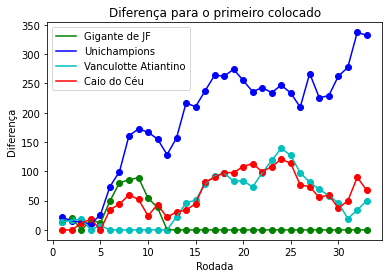

In [38]:
rodadas = [i for i in range(1, RODADAS+1)]
plt.title("Diferença para o primeiro colocado")
plt.ylabel("Diferença")
plt.xlabel("Rodada")
plt.scatter(rodadas, gigante, color='g')
plt.plot(rodadas, gigante, color='g', label='Gigante de JF')
plt.scatter(rodadas, unichampions, color='b')
plt.plot(rodadas, unichampions, color='b', label='Unichampions')
plt.scatter(rodadas, vanculotte, color='c')
plt.plot(rodadas, vanculotte, color='c', label='Vanculotte Atiantino')
plt.scatter(rodadas, caio, color='r')
plt.plot(rodadas, caio, color='r', label='Caio do Céu')
plt.legend()
plt.show()